# **Predictive Analytics : Harga Tiket Pesawat**

Oleh : [Muhammad Lailfachry Yusrie](https://github.com/FachryYusrie/Proyek-Machine-Learning-Dicoding-Predictive-Analytics-Prediksi-Harga-Tiket-Pesawat)

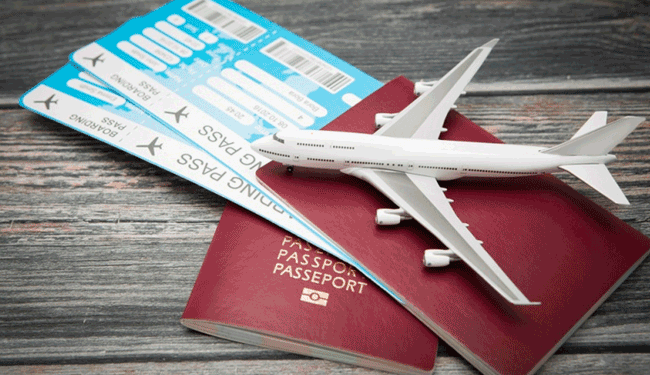

## **1. Domain Proyek**

**1.1 Latar Belakang**

Industri penerbangan global telah mengalami pertumbuhan yang signifikan, menjadikan perjalanan udara sebagai moda transportasi yang semakin mudah diakses dan penting bagi individu maupun bisnis. Di tengah dinamika pasar yang kompleks, harga tiket pesawat seringkali berfluktuasi secara drastis, dipengaruhi oleh berbagai faktor seperti waktu keberangkatan, rute, maskapai penerbangan, kelas penerbangan, musim, hingga dinamika penawaran dan permintaan. Volatilitas harga ini menjadi tantangan tersendiri bagi konsumen yang ingin merencanakan perjalanan dengan efisien dan hemat biaya. Tanpa informasi yang akurat mengenai estimasi harga yang wajar, penumpang berisiko membayar lebih mahal dari yang seharusnya atau kesulitan dalam mengalokasikan anggaran perjalanan secara optimal [[1](https://kumparan.com/jendela-dunia/kenapa-harga-tiket-pesawat-naik-turun-cari-tahu-jawabannya-di-sini-212Dwje2OR3)].
Pengembangkan model prediktif harga tiket pesawat ini diharapkan dapat memberikan estimasi harga yang akurat dan relevan bagi travel agent. Dengan memanfaatkan teknik machine learning berbasis regresi pada kumpulan data pemesanan tiket pesawat, model ini diharapkan mampu mengidentifikasi pola dan hubungan antara berbagai fitur perjalanan (maskapai, waktu keberangkatan, jumlah transit, durasi penerbangan, kota asal/tujuan, kelas, dan sisa hari sebelum keberangkatan) dengan harga tiket. Informasi prediksi harga ini akan memberdayakan konsumen untuk mengambil keputusan yang lebih cerdas. Penumpang dapat membandingkan harga yang ditawarkan oleh maskapai atau agen perjalanan dengan harga prediksi model, sehingga memungkinkan mereka untuk mengidentifikasi apakah harga yang ditawarkan lebih mahal atau lebih murah dari ekspektasi.

## **2. Business Understanding**

### 2.1 Problem Statement

-  Bagaimana membuat model machine learning yang dapat memprediksi harga tiket pesawat berdasarkan data harga tiket sebelumnya dan faktor yang mempengaruhi?
-  Model yang seperti apa yang memiliki akurasi paling baik?
-  Bagaimana model ini dapat membantu travel agent dan penumpang dalam mengestimasi harga tiket pesawat dengan tepat?

### 2.2 Goals

- Membuat model machine learning yang dapat memprediksi harga tiket pesawat berdasarkan data harga tiket sebelumnya.
- Membandingkan beberapa algoritma model untuk menemukan akurasi terbaik dalam memprediksi harga tiket.
- Mengembangkan aplikasi yang mudah digunakan untuk membantu penumpang mengestimasi harga tiket pesawat dan mengimplmentasikan model prediktif kedalam sistem yang digunakan travel agent.

### 2.3 Solution Statement

-  Menganalisis data dengan melakukan univariate analysis dan multivariate analysis. Memahami data juga dapat dilakukan dengan visualisasi. Memahami data dapat membantu untuk mengetahui kolerasi matrix antar fitur dan mendeteksi outlier.
- Melakukan proses data cleaning dan normalisai data agar mendapat prediksi yang baik.
- Membuat beberapa variasi model untuk mendapatkan model yang paling baik dari beberapa model yang telah dibuat untuk prediksi harga tiket pesawat. Diantaranya adalah menggunakan:
    * Linear Regression.
    * Random Forest.
    * XGBoost (Extreme Gradient Boosting).

**Import Library yang Dibutuhkan**

In [1]:
!pip install -q kaggle

In [2]:
#Import Load data Library
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Import One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
# Import PCA
from sklearn.decomposition import PCA
# Import train test split
from sklearn.model_selection import train_test_split
# Import Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
# Import cross val score
from sklearn.model_selection import cross_val_score
# Import Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# Import matric evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## **3. Data Understanding**

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

Data Loading merupakan tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami.

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fakuri","key":"c32c2f5245cdc385aea689fd4d880162"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d shubhambathwal/flight-price-prediction

Dataset URL: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction
License(s): CC0-1.0
  0% 0.00/4.16M [00:00<?, ?B/s]
100% 4.16M/4.16M [00:00<00:00, 615MB/s]


In [6]:
zip_ref = zipfile.ZipFile('/content/flight-price-prediction.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [7]:
df = pd.read_csv('/content/Clean_Dataset.csv')

**Exploratory Data Analysis (EDA)**

Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

#### 2.1 EDA - Deskripsi Variabel

In [8]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Terdapat kolom yang tidak memiliki nama dan memiliki arti yang sama dengan nomor baris, sehingga dapat dihapus dari dataframe.

In [9]:
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

In [10]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Dari dataframe di atas, terdapat 300153 baris dan 11 kolom, diantaranya:

1) **Airline**: Nama perusahaan penerbangan disimpan di kolom maskapai penerbangan. Ini adalah fitur kategoris yang memiliki 6 maskapai penerbangan yang berbeda.

2) **Flight**: Penerbangan menyimpan informasi mengenai kode penerbangan pesawat. Ini adalah fitur kategoris.

3) **Source City**: Kota tempat penerbangan lepas landas. Ini adalah fitur kategoris yang memiliki 6 kota unik.

4) **Departure** Time: Ini adalah fitur kategoris turunan yang diperoleh dengan mengelompokkan periode waktu ke dalam kelompok. Ini menyimpan informasi tentang waktu keberangkatan dan memiliki 6 label waktu yang unik.

5) **Stops**: Fitur kategoris dengan 3 nilai berbeda yang menyimpan jumlah perhentian antara kota asal dan tujuan.

6) **Arrival Time**: Ini adalah fitur kategoris turunan yang dibuat dengan mengelompokkan interval waktu ke dalam kotak. Fitur ini memiliki enam label waktu yang berbeda dan menyimpan informasi tentang waktu kedatangan.

7) **Destination City**: Kota tempat pesawat akan mendarat. Ini adalah fitur kategoris yang memiliki 6 kota unik.

8) **Class**: Fitur kategoris yang berisi informasi tentang kelas kursi; fitur ini memiliki dua nilai yang berbeda: Bisnis dan Ekonomi.

9) **Duration**: Fitur berkelanjutan yang menampilkan jumlah waktu keseluruhan yang diperlukan untuk bepergian antar kota dalam hitungan jam.

10) **Days Left**: Ini adalah karakteristik turunan yang dihitung dengan mengurangi tanggal perjalanan dengan tanggal pemesanan.

11) **Price**: Variabel target menyimpan informasi tentang harga tiket (dalam kurs India/Rupe).


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


Hasil eksekusi df.info() didapatkan infromasi bahwa:
- Terdapat 3 kolom numerikal: duration, days_left, price.
- Terdapat 8 kolom kategorikal: airline, flight, source_city, departure_time, stops, arrival_time, destination_city, dan class.

In [12]:
df.shape

(300153, 11)

Setelah membuat fitur yang tidak diperlukan, didapatkan dataframe dengan 300153 baris dan 11 kolom.

In [14]:
df.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `unique` adalah jumlah variasi variabel pada data.
- `top` adalah variabel dengan sampel terbanyak pada data.
- `freq` adalah jumlah sampel dari variabel terbanyak pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

#### 2.2 EDA - Menangani Missing Value dan Outliers

In [15]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


Terlihat bahwa tidak ada missing value pada data.

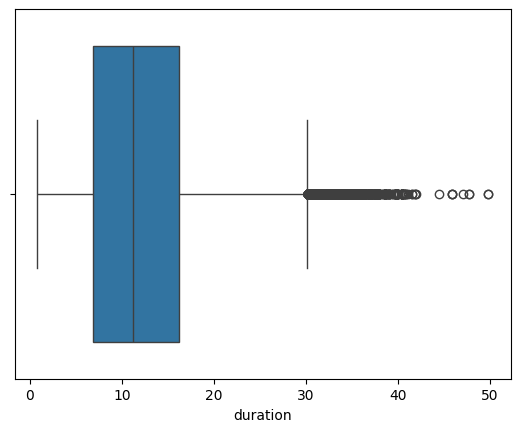

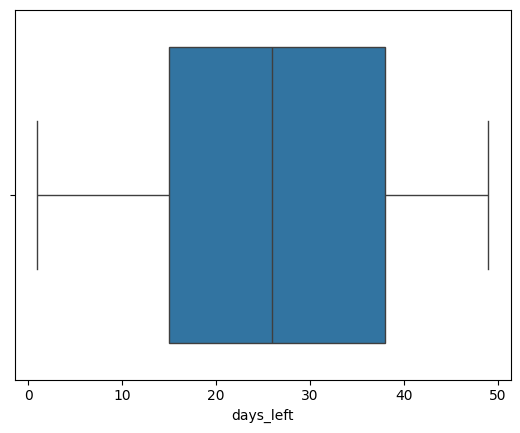

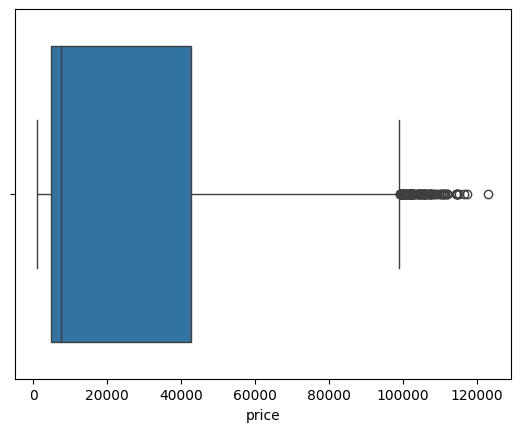

In [16]:
df_outlier=df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure()
        sns.boxplot(data=df_outlier, x=column)

Pada kasus ini, kita akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, menangani outliers dengan teknik IQR method.

```
IQR = Inter Quartile Range
IQR = Q3 - Q1
```

In [17]:
# Ambil hanya kolom numerikal
numeric_cols = df.select_dtypes(include='number').columns
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df = df[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
df.shape

(297920, 11)

#### 2.3 EDA - Univariate Analysis

In [18]:
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

##### Numerikal

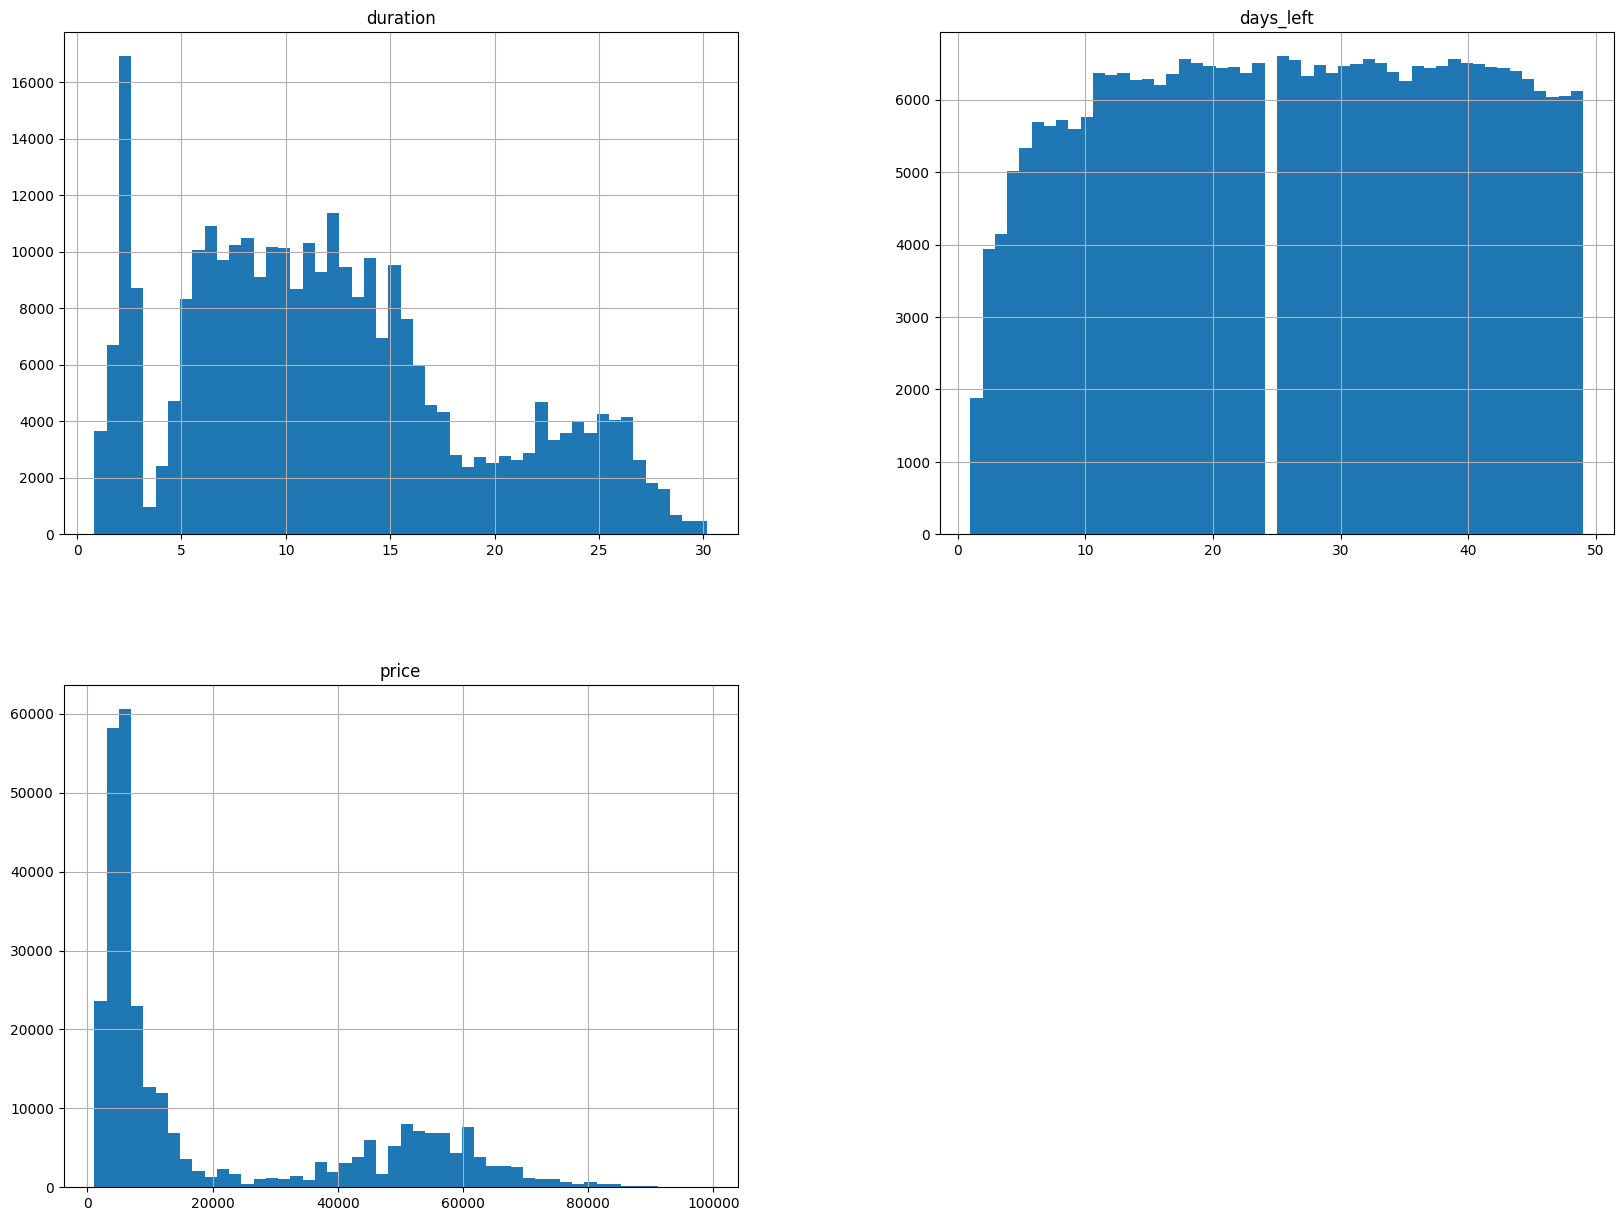

In [19]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Distribusi kolom durasi menunjukkan kecenderungan yang signifikan. Plot menunjukkan bahwa penerbangan dengan durasi antara 0-5 jam memiliki frekuensi tertinggi, menunjukkan bahwa rentang ini adalah yang paling umum dalam dataset.
Distribusi variabel harga juga menunjukkan tanda-tanda skewness.

##### Kategorikal

<ipython-input-22-1069036047>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[list_col[i]],
<ipython-input-22-1069036047>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[list_col[i]],
<ipython-input-22-1069036047>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[list_col[i]],
<ipython-input-22-1069036047>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[li

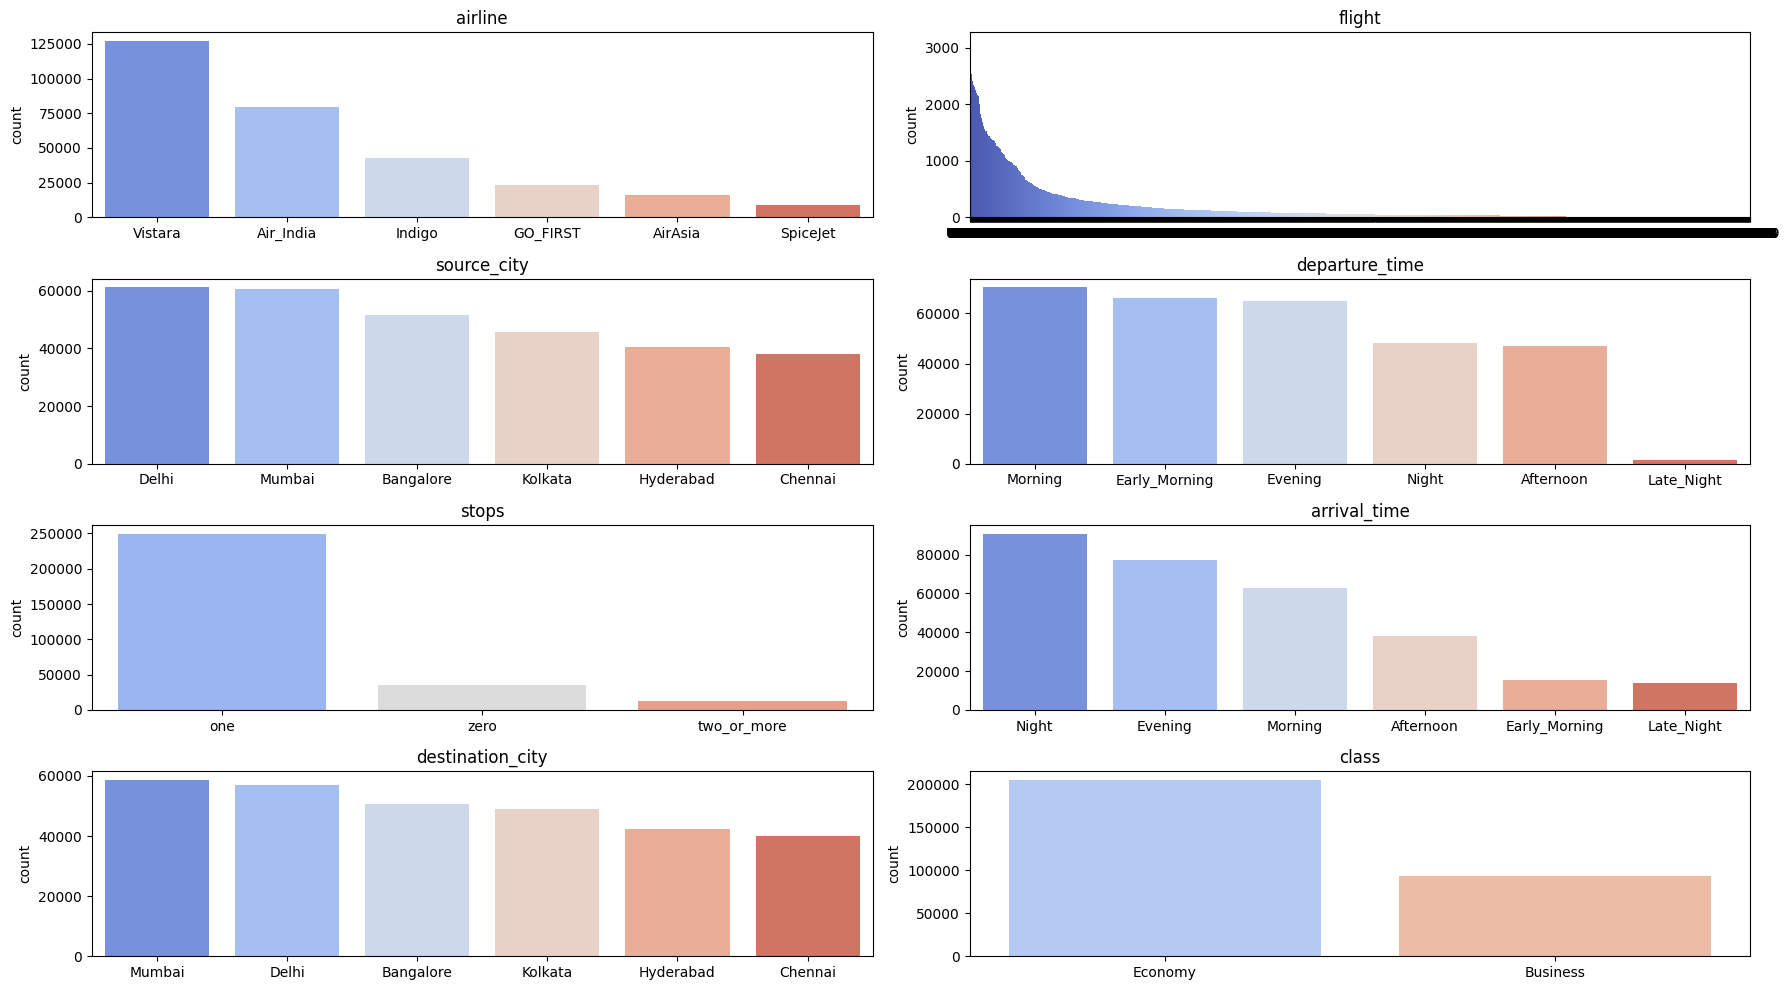

In [22]:
list_col = categorical_columns
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18,10))
ax = ax.flatten()

for i in range(len(list_col)):
    order = df[list_col[i]].value_counts().index

    sns.countplot(x = df[list_col[i]],
                  ax=ax[i],
                  order=order,
                  palette = 'coolwarm')
    ax[i].set_title(list_col[i])
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

- Airline: Vistara merupakan maskapai yang paling populer di kalangan penumpang, sementara SpiceJet memiliki jumlah penumpang terendah. Hal ini menunjukkan bahwa Vistara mungkin memiliki pangsa pasar yang lebih besar dibandingkan dengan maskapai lainnya.
- Flight: Terlihat bahwa begitu banyak nomor kode penerbangan yang terdapat pada data penerbangan.
- Stops: Didapatkan bahwa banyak penerbangan yang hanya membutuhkan satu kali penerbangan tanpa perlu melakukan transit.
- Class: Kelas ekonomi merupakan pilihan yang paling disukai oleh para pelancong, secara signifikan melampaui popularitas kelas bisnis.
- Source City: Delhi menjadi kota asal dengan jumlah penerbangan tertinggi, diikuti oleh Mumbai dan Bangalore. Tren ini dapat dikaitkan dengan kota metropolitan besar seperti Delhi yang memiliki bandara yang lebih besar dan volume penerbangan yang lebih besar.
- Destination City: Mumbai adalah kota tujuan paling populer untuk penerbangan, diikuti oleh Delhi dan Bangalore di belakangnya.
- Departure Time: Pagi dan Dini Hari adalah waktu keberangkatan puncak, menunjukkan preferensi di antara penumpang untuk memulai perjalanan mereka di pagi hari.
- Arrival Time: Sebaliknya, Malam dan Sore hari adalah waktu kedatangan yang paling umum, menunjukkan bahwa penumpang lebih menyukai perjalanan di malam hari untuk mencapai tujuan mereka.

#### 2.4 EDA - Bivariate Analysis

##### Kategorikal

<ipython-input-21-489844967>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_categories,
<ipython-input-21-489844967>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_categories,
<ipython-input-21-489844967>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_categories,
<ipython-input-21-489844967>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_

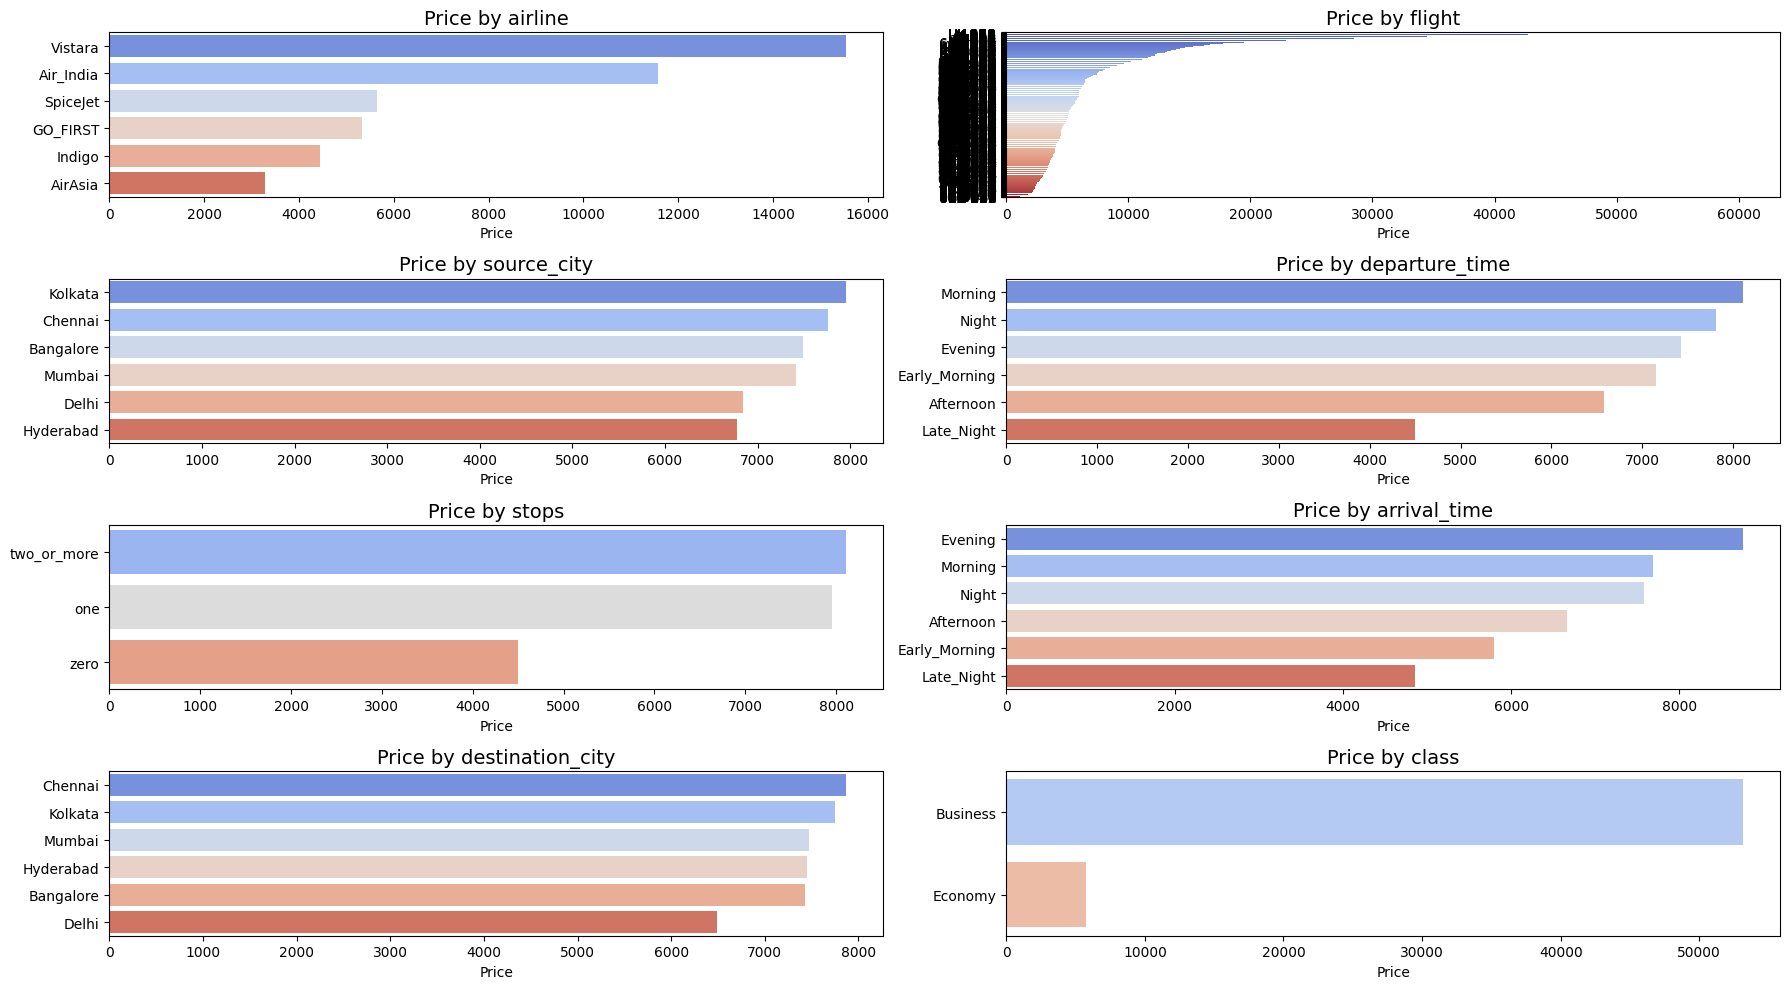

In [21]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18,10))
ax = ax.flatten()

for i, bar in enumerate(categorical_columns):
    flight_fare = df.groupby(bar)['price'].median().reset_index()
    sorted_categories = flight_fare.sort_values(by = 'price', ascending=False)

    sns.barplot(data=sorted_categories,
                y = bar,
                x ='price',
                palette = 'coolwarm',
                ax = ax[i])

    ax[i].set_title(f'Price by {bar}', fontsize=14)
    ax[i].set_xlabel('Price')
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()

Dari analisis multivariate untuk fitur kategori terhadap harga tiket didapatkan:

- **Price by Airline**: Vistara memiliki tarif penerbangan rata-rata tertinggi di antara semua maskapai penerbangan, yang mengindikasikan bahwa tiket Vistara secara umum lebih mahal dibandingkan dengan para pesaingnya. Di sisi lain, SpiceJet, GO_FIRST, Indigo, dan AirAsia menawarkan tarif penerbangan yang relatif lebih rendah, sehingga menjadi pilihan yang lebih terjangkau bagi para penumpang.
- **Price by Flight**: Kode penerbangan yang termahal secara mahal mungkin mengindikasi penerbangan yang menggunakan airline dari Vistara.
- **Price by Class**: Harga tiket kelas bisnis secara signifikan lebih tinggi dibandingkan kelas ekonomi. Harga tiket kelas ekonomi lebih terjangkau, sehingga menjadi pilihan yang populer bagi sebagian besar penumpang.
- **Price by Total Stops**: Penerbangan dengan jumlah stop >= 2 cenderung lebih mahal dibandingkan penerbangan non-stop. Temuan ini cukup menarik karena biasanya penerbangan nonstop akan cenderung lebih pricey. Hal ini mungkin dapat disebabkan karena mayoritas penerbangan nonstop adalah penerbangan jarak dekat yang memiliki harga tiket lebih rendah.
- **Price by Source City**: Kalkota, Chennai dan Bangalore menjadi kota keberangkatan dengan harga tiket pesawat paling tinggi.
- **Price by Destination City**: Chennai, Kolkata, dan Mumbai menjadi kota tujuan penerbangan dengan harga tiket pesawat paling tinggi.
- **Price by Departure dan Arrival Time**: Harga tiket pesawat untuk penerbangan atau kedatangan tengah malam cenderung lebih murah dibandingkan waktu lainnya.

##### Numerikal

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


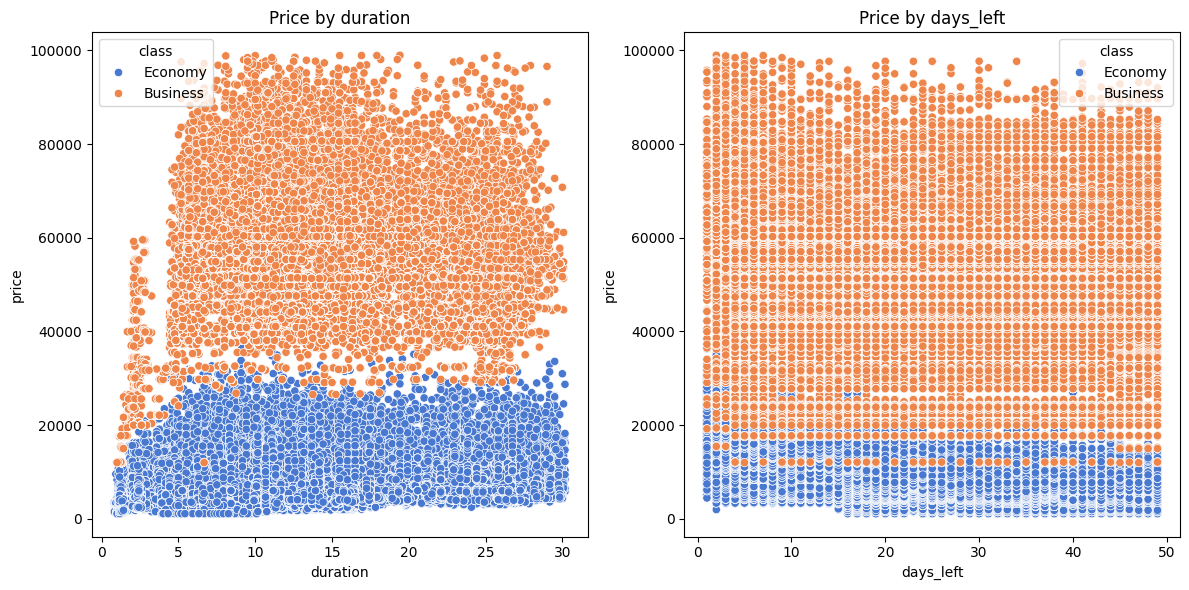

In [23]:
cols = ['duration', 'days_left']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for i in range(len(cols)):
    sns.scatterplot(data = df,
                    x = cols[i],
                    y = 'price',
                    hue = 'class',
                    ax = ax[i],
                    palette = 'muted')
    ax[i].set_title(f'Price by {cols[i]}')
    ax[i].set_xlabel(cols[i])

plt.tight_layout()
plt.show()

Dari analisis multivariate untuk fitur numerikal terhadap harga tiket untuk kelas ekonomi dan bisnis didapatkan:

**Price by Duration:**

Kelas Bisnis memiliki kisaran harga yang jauh lebih tinggi dibandingkan dengan Kelas Ekonomi untuk hampir semua durasi penerbangan.
Umumnya, harga untuk Kelas Ekonomi di bawah 400 USD, sedangkan Kelas Bisnis bisa mencapai harga di atas 1200 USD.
Durasi penerbangan yang lebih lama tidak selalu berkorelasi langsung dengan harga yang lebih tinggi. Meskipun harga cenderung lebih tinggi untuk penerbangan yang lebih lama, terbukti bahwa harga tertinggi sedikit menurun untuk beberapa durasi yang sangat lama, terutama di Kelas Bisnis. Hal ini menunjukkan bahwa faktor selain durasi, seperti permintaan atau rute tertentu, juga dapat memengaruhi dinamika harga untuk penerbangan yang lebih lama.

**Price by Days Left:**

Tidak ada korelasi yang kuat antara harga tiket dan jumlah hari yang tersisa sebelum penerbangan, baik untuk Kelas Bisnis maupun Kelas Ekonomi. Oleh karena itu, tidak dapat diasumsikan bahwa membeli tiket lebih awal akan menghasilkan harga yang lebih murah.
Namun, ada tren yang menunjukkan bahwa harga tiket cenderung naik sedikit ketika mendekati tanggal keberangkatan, meskipun harga tetap cukup bervariasi secara keseluruhan. Hal ini menunjukkan bahwa meskipun membeli tiket di menit-menit terakhir tidak selalu menghasilkan harga yang lebih tinggi secara signifikan, harga tiket dapat berfluktuasi berdasarkan permintaan dan ketersediaan.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

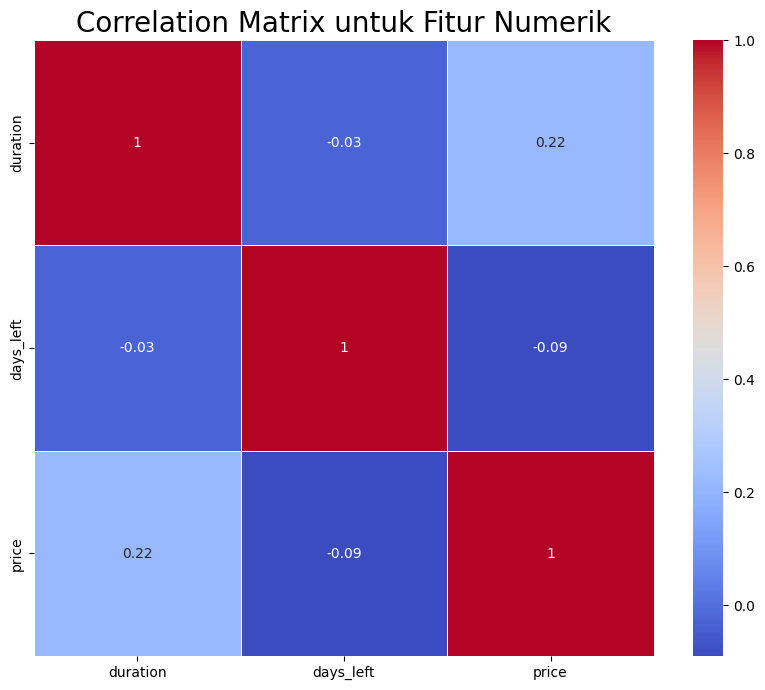

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)

## **4. Data Preparation**

Data Preparation merupakan tahap untuk mempersiapkan data sebelum masuk ke tahap pembuatan model Machine Learning.

### 4.1 Feature Selection

Krena tujuan dari prediksi harga tiket pesawat ini bersifat umum atau semua negara bisa menggunakan, maka fitur "Airline", "Flight", "Source City", dan "Destination City" tidak akan digunakan karena data ini spesifik hanya berada di India.

In [26]:
df = df.drop(columns=['airline', 'flight', 'source_city', 'destination_city'])
df.head()

,departure_time,stops,arrival_time,class,duration,days_left,price
0,Evening,zero,Night,Economy,2.17,1,5953
1,Early_Morning,zero,Morning,Economy,2.33,1,5953
2,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956
3,Morning,zero,Afternoon,Economy,2.25,1,5955
4,Morning,zero,Morning,Economy,2.33,1,5955


Harga tiket pesawat sebelumnya masih menggunakan mata uang India (Rupe), Oleh karena itu perlu mengonversi harga tiket ke mata uang yang banyak digunakan secara global seperti dolar amerika serikat (USD).

In [27]:
df['price_usd'] = df['price'] * 0.012 # harga tiket pesawat dari kurs India (Rupe) di konversi ke kurs USA (USD)
df = df.drop(columns=['price'])
df.head()

,departure_time,stops,arrival_time,class,duration,days_left,price_usd
0,Evening,zero,Night,Economy,2.17,1,71.436
1,Early_Morning,zero,Morning,Economy,2.33,1,71.436
2,Early_Morning,zero,Early_Morning,Economy,2.17,1,71.472
3,Morning,zero,Afternoon,Economy,2.25,1,71.460
4,Morning,zero,Morning,Economy,2.33,1,71.460


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297920 entries, 0 to 300152
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   departure_time  297920 non-null  object 
 1   stops           297920 non-null  object 
 2   arrival_time    297920 non-null  object 
 3   class           297920 non-null  object 
 4   duration        297920 non-null  float64
 5   days_left       297920 non-null  int64  
 6   price_usd       297920 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 18.2+ MB


### 4.2 Encoding Fitur Kategorikal

In [29]:
df = pd.concat([df, pd.get_dummies(df['departure_time'], prefix='departure_time')],axis=1)
df = pd.concat([df, pd.get_dummies(df['stops'], prefix='stops')],axis=1)
df = pd.concat([df, pd.get_dummies(df['arrival_time'], prefix='arrival_time')],axis=1)
df = pd.concat([df, pd.get_dummies(df['class'], prefix='class')],axis=1)
df.drop(['departure_time','stops','arrival_time', 'class'], axis=1, inplace=True)
# Select multiple columns using a list
df_temp = df[['duration', 'price_usd']]
# Convert all columns except 'duration' and 'price_usd' to int
columns_to_convert = df.columns.difference(['duration', 'price_usd'])
df[columns_to_convert] = df[columns_to_convert].astype(int)
df['duration'] = df_temp['duration']
df['price_usd'] = df_temp['price_usd']
df.head()

,duration,days_left,price_usd,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
0,2.17,1,71.436,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,2.33,1,71.436,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,2.17,1,71.472,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,2.25,1,71.460,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
4,2.33,1,71.460,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


### 4.3 Train Test Split

In [30]:
X = df.drop(["price_usd"],axis =1)
y = df["price_usd"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 297920
Total # of sample in train dataset: 268128
Total # of sample in test dataset: 29792


### 4.4 Normalisasi

In [31]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
df.head()

,duration,days_left,price_usd,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_one,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,class_Business,class_Economy
0,2.17,1,71.436,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,2.33,1,71.436,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,2.17,1,71.472,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,2.25,1,71.460,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
4,2.33,1,71.460,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


## **5. Modelling**

Dalam analisis ini, digunakan beberapa model regresi yang relevan, termasuk Linear Regression, Random Forest, dan XGBoost, untuk membandingkan performa dan akurasi masing-masing model.

- **Linear Regression** dipilih karena simple dan interpretable dalam menjelaskan hubungan antara fitur dan target.
- **Random Forest**, sebagai model ensemble, membantu dalam menangani non-linearitas dan interaksi antar fitur dengan memberikan prediksi yang lebih stabil.
- **XGBoost** dikenal sebagai algoritma boosting yang efisien dan sangat efektif dalam menangani data besar dan kompleks, serta dapat meningkatkan akurasi model.

### 5.1 Baseline Model

Karena target variabel yang dianalisis adalah numerik kontinu, rata-rata digunakan sebagai baseline model. Dengan membandingkan hasil prediksi model dengan nilai rata-rata dari data, dapat diukur seberapa baik model yang dibangun mampu menjelaskan variasi dalam data dan memberikan prediksi yang lebih akurat daripada sekadar menggunakan rata-rata.

In [33]:
y_pred_baseline = np.mean(y_train)
print(f'Baseline prediction: {y_pred_baseline:.3f}')

Baseline prediction: 250.445


In [34]:
def root_mean_square_error(y_true, y_pred):
    """
    Calculate the root mean square error (RMSE) between true and predicted values.

    Parameters
    ----------
    y_true : array-like
        True target values.

    y_pred : array-like
        Predicted values from the model.

    Returns
    -------
    rmse : float
        The root mean square error, representing the standard deviation of the prediction errors.
    """
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

In [35]:
rmse_baseline_train = root_mean_square_error(y_true = y_train,
                                             y_pred = np.ones(len(y_train)) * y_pred_baseline)

print(f'RMSE Baseline on training set: {rmse_baseline_train}')

RMSE Baseline on training set: 271.9329110197375


Didapatkan bahwa RMSE Baseline dari training set yang ada tanpa pelatihan model sebelumnya yaitu 271.93

### 5.2 Model Training dan Evaluation

In [36]:
def fit_model(model, X_train, y_train):
    """
    Fit the given model to the training data, calculate training and cross-validation
    RMSE, and compute the R² score.

    Parameters
    ----------
    model : estimator object
        The machine learning model to be trained.

    X_train : array-like, shape (n_samples, n_features)
        Training data features.

    y_train : array-like, shape (n_samples,)
        Target values for the training data.

    Returns
    -------
    model : estimator object
        The trained model.

    metrics : pandas DataFrame
        DataFrame containing RMSE for training, RMSE for cross-validation,
        and R² score.
    """
    # fitting the model
    model.fit(X_train, y_train)

    # predict the model
    y_pred_train = model.predict(X_train)
    train_rmse = root_mean_square_error(y_true = y_train,
                                         y_pred = y_pred_train)

    # cross validation
    valid_score = cross_val_score(estimator = model,
                                  X = X_train,
                                  y = y_train,
                                  cv = 5,
                                  scoring = 'neg_mean_squared_error')
    cv_rmse = np.sqrt(-np.mean(valid_score))

    # calculate r2 score
    train_r2 = r2_score(y_train, y_pred_train)

    # store metrics
    metrics = pd.DataFrame({
        'Metrics' : ['RMSE Train', 'RMSE CV', 'R2 Score'],
        'Score' : [train_rmse, cv_rmse, train_r2]
    })

    return model, metrics

#### 5.2.1 Linear Regression

In [37]:
model_lr, metrics_lr = fit_model(model = LinearRegression(),
                                 X_train = X_train,
                                 y_train = y_train)

metrics_lr

,Metrics,Score
0,RMSE Train,84.230744
1,RMSE CV,84.236595
2,R2 Score,0.904056


- RMSE pada training set dengan Linear Regression adalah 84.2307, dan RMSE pada cross-validation set adalah 84.2366, yang menunjukkan konsistensi model dalam memprediksi data.
- R2 score sebesar 0.9041 menunjukkan bahwa sekitar 90% variabilitas dalam data target dapat dijelaskan oleh fitur-fitur dalam model.
- Sebagai perbandingan, baseline model memiliki RMSE sebesar 271.93, yang berarti model Linear Regression jauh lebih akurat dalam memprediksi dibandingkan baseline.

#### 5.2.2 Random Forest

In [38]:
model_rf, metrics_rf = fit_model(model = RandomForestRegressor(n_estimators=50, random_state=123),
                                 X_train = X_train,
                                 y_train = y_train)
metrics_rf

,Metrics,Score
0,RMSE Train,45.982051
1,RMSE CV,67.913056
2,R2 Score,0.971407


- RMSE pada training set adalah 45.98, yang mengindikasikan bahwa model dapat memprediksi dengan akurasi tinggi pada data pelatihan.
- Namun, RMSE pada cross-validation (CV) set adalah 67.91, menunjukkan bahwa meskipun model menunjukkan performa yang baik pada training set, ada penurunan akurasi saat diujikan pada data yang tidak terlihat.
- R2 Score sebesar 0.9714 menunjukkan bahwa sekitar 97.14% variabilitas dalam data target dapat dijelaskan oleh model, namun penting untuk mengevaluasi lebih lanjut untuk memastikan bahwa model tidak overfit.

#### 5.2.3 XGBoost

In [39]:
model_xgb, metrics_xgb = fit_model(model = XGBRegressor(objective='reg:squarederror', random_state = 123),
                                   X_train = X_train,
                                   y_train = y_train)
metrics_xgb

,Metrics,Score
0,RMSE Train,58.431482
1,RMSE CV,59.637176
2,R2 Score,0.953829


- RMSE pada training set adalah 58.43, sedangkan RMSE pada CV set adalah 59.64, menunjukkan bahwa meskipun ada sedikit peningkatan error, model tetap mampu memberikan prediksi yang relevan.
- R2 Score sebesar 0.9538 menunjukkan bahwa sekitar 95.38% variabilitas dalam data target dapat dijelaskan oleh model, menandakan bahwa model ini efektif dalam menangkap hubungan antara fitur dan target.

#### 5.2.4 Perbandingan

In [40]:
# create a dictionary to store the model evaluation metrics
model_results = {
    'Linear Regression': {
        'RMSE Train': 84.230744,
        'RMSE CV': 84.236595,
        'R2 Score': 0.904056
    },
    'Random Forest': {
        'RMSE Train': 45.982051,
        'RMSE CV': 67.913056,
        'R2 Score': 0.971407
    },
    'XGBoost': {
        'RMSE Train': 58.431482,
        'RMSE CV': 59.637176,
        'R2 Score': 0.953829
    }}

# convert the model results dictionary into a pandas DataFrame
df_results = pd.DataFrame(model_results).T
df_results = df_results.reset_index().rename(columns={'index': 'Model'})
df_results

,Model,RMSE Train,RMSE CV,R2 Score
0,Linear Regression,84.230744,84.236595,0.904056
1,Random Forest,45.982051,67.913056,0.971407
2,XGBoost,58.431482,59.637176,0.953829


Berdasarkan hasil ini, diputuskan untuk melakukan hyperparameter tuning pada model **Random Forest**, mengingat model ini memiliki R2 Score tertinggi.

### 5.3 Hyperparameter Tunning

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definisikan parameter distribution
param_dist = {
    'n_estimators' : randint(100, 300),
    'max_depth' : [None, 10, 20, 30, 40, 50],
    'min_samples_split' : randint(2, 11),
    'min_samples_leaf' : randint(1, 5),
    'max_features' : [1.0, 'auto', 'sqrt']
}

# Inisiasi Random Forest Regressor
model_rf = RandomForestRegressor(random_state=123, n_jobs = -1)

# Inisiasi RandomizedSearchCV dengan parameter distribution yang telah didefinisikan
random_search = RandomizedSearchCV(estimator = model_rf,
                                   param_distributions = param_dist,
                                   n_iter = 2,
                                   cv = 3,
                                   scoring = 'neg_mean_squared_error',
                                   verbose = 2,
                                   random_state = 123,
                                   n_jobs = -1)

# Latih RandomizedSearchCV model
random_search.fit(X_train, y_train)

# Ambil estimator terbaik yang ditemukan selama pencarian
best_regressor = random_search.best_estimator_
best_regressor

Fitting 3 folds for each of 2 candidates, totalling 6 fits


RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=8, n_estimators=196, n_jobs=-1,
                      random_state=123)

## **6. Evaluation**

In [42]:
model_best, metrics_best = fit_model(model = best_regressor,
                                     X_train = X_train,
                                     y_train = y_train)
metrics_best

,Metrics,Score
0,RMSE Train,52.714566
1,RMSE CV,61.470839
2,R2 Score,0.962422


- Setelah melakukan hyperparameter tuning pada model Random Forest, RMSE pada training set kini mencapai 52.72, sementara RMSE pada CV set adalah 61.47.
- R2 Score menurun menjadi 0.9624, namun RMSE pada trainning set mengalami peneurunan performa dibandingkan model random forest sebelum di tunning dan RMSE pada CV mengalami peningkatan performa dibandingkan sebelumnya.
- Hal ini mengindikasikan bahwa meskipun mengalami penurunan performa, potensi terjadinya overvitting telah berkurang dari hasil hyperparameter tunning dan random forest tetap menajdi model terbaik berdasarkan R2 Score yang didapatkan.

In [43]:
# predict data test with best model
y_pred_test = best_regressor.predict(X_test)
test_rmse = root_mean_square_error(y_true = y_test,
                                   y_pred = y_pred_test)

# calculate r2 score
test_r2 = r2_score(y_test, y_pred_test)

print(f'RMSE Test set: {round(test_rmse, 2)}')
print(f'R2 Score Test set: {round(test_r2, 2) * 100}%')

RMSE Test set: 61.27
R2 Score Test set: 95.0%


Text(0.5, 1.0, 'Prediction vs Actual Harga Tiket')

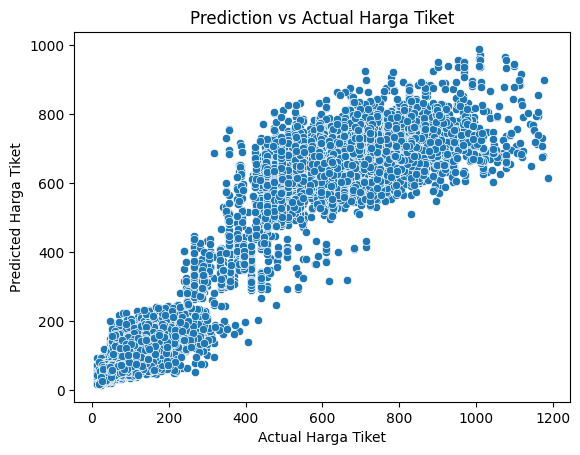

In [44]:
# create a scatter plot to compare actual and predicted flight fares
sns.scatterplot(x = y_test, y = y_pred_test)
plt.xlabel('Actual Harga Tiket')
plt.ylabel('Predicted Harga Tiket')
plt.title('Prediction vs Actual Harga Tiket')